# PyTriWild Tutorial: Robust Triangulation with Curve Constraints

PyTriWild provides robust triangulation with curve constraints. This tutorial covers simple to complex examples.

## Key Parameters

**Input**: `vertices_in` (vertices), `edges_in` (edge connectivity)

**Quality**: `stop_quality` (lower = higher quality), `max_iterations`

**Control**: `epsilon` (precision), `target_edge_length`, `cut_outside`

**Returns**: vertices, triangles, boundary_edges, info

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pytriwild as triwild 
import wildmeshing as wm
from matplotlib.collections import LineCollection
from utils import plot_triangulation
from pprint import pprint

In [57]:
pprint(dir(wm))

['Tetrahedralizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boolean_operation',
 'tetrahedralize',
 'triangulate',
 'triangulate_data',
 'triangulate_svg']


In [58]:
pprint(wm.triangulate.__doc__)

("triangulate(input: str, feature_input: str = '', output: str = '', "
 'stop_quality: float = -1, max_its: int = 80, stage: int = 1, epsilon: float '
 '= -1, feature_epsilon: float = 0.001, target_edge_len: float = -1, '
 'edge_length_r: float = 0.05, flat_feature_angle: float = 10.0, cut_outside: '
 "bool = False, skip_eps: bool = False, hole_file: str = '', mute_log: bool = "
 'False) -> None\n'
 '\n'
 'Robust Triangulation\n')


In [59]:
pprint(wm.triangulate_data.__doc__)

('triangulate_data(V: numpy.ndarray[numpy.float64[m, n]], E: '
 'numpy.ndarray[numpy.int32[m, n]], feature_info: object = None, stop_quality: '
 'float = -1, max_its: int = 80, stage: int = 1, epsilon: float = -1, '
 'feature_epsilon: float = 0.001, target_edge_len: float = -1, edge_length_r: '
 'float = 0.05, flat_feature_angle: float = 10.0, cut_outside: bool = False, '
 'skip_eps: bool = False, hole_pts: numpy.ndarray[numpy.float64[m, n]] = '
 'array([], shape=(0, 0), dtype=float64), mute_log: bool = False) -> tuple\n'
 '\n'
 'Robust Triangulation\n')


In [60]:
pprint(wm.tetrahedralize.__doc__)

("tetrahedralize(input: str, output: str = '', stop_quality: float = 10, "
 'max_its: int = 80, stage: int = 2, stop_p: int = -1, epsilon: float = 0.001, '
 'edge_length_r: float = 0.05, mute_log: bool = False, skip_simplify: bool = '
 'False, coarsen: bool = True, smooth_open_boundary: bool = False, floodfill: '
 'bool = False, manifold_surface: bool = False, use_input_for_wn: bool = '
 'False, correct_surface_orientation: bool = False, all_mesh: bool = False, '
 'binary: bool = True) -> bool\n'
 '\n'
 'Robust Tetrahedralization, this is an alpha developement version of TetWild. '
 'For a stable release refer to the C++ version '
 'https://github.com/Yixin-Hu/TetWild\n')


## Example 1: Simple Square

Let's start with the simplest case - triangulating a square boundary.

Input:
Vertices shape: (4, 2)
Edges shape: (4, 2)

Output:
Output vertices shape: (96, 2)
Output triangles shape: (143, 3)
Boundary edges shape: (0, 2)
Number of triangles generated: 143
Loading and preprocessing ...
remove duplicates:
#v 4->4
#e 4->4
simplify:
#v 4->4
#e 4->4
Loaded and preprocessed.
time = 9.8e-05s

BSP subdivision...
#v 104->164
#f 170->290
BSP subdivision done.
time = 0.0007949999999999999s

Mesh optimization...
#v = 164(164)    unrounded = 0
#t = 290(290)
max_energy = 4.981176342655092
avg_energy = 2.60787642534591
min_angle = 23.86713602338203, max_angle = 96.56551929006274
< 5: 0, < 10: 0, < 15: 0
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 798
success 30
re-push 62
queue_s.size() = 25
success 2
re-push 5
edge collapsing done!
time = 0.000811s
#v = 132(164)    unrounded = 0
#t = 226(290)
max_energy = 3.120670898309812
avg_energy = 2.385334590936578
min_angle = 23.86713602338204, max_angle = 11

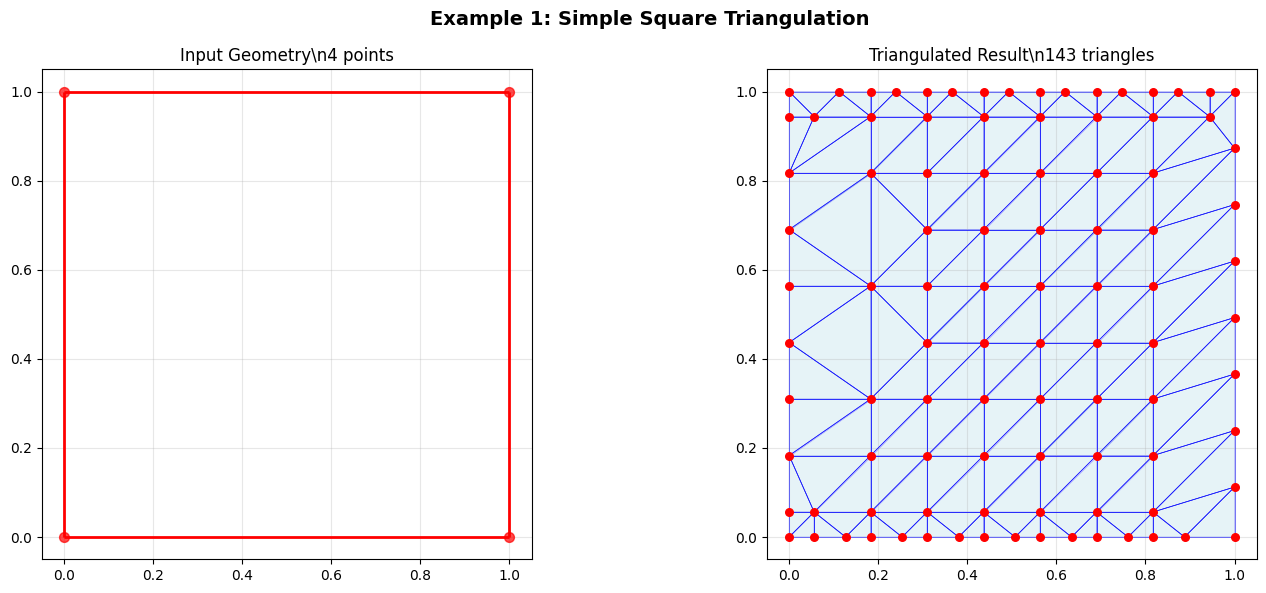

In [61]:
# Define a simple square
vertices_square = np.array([
    [0.0, 0.0],  # bottom-left
    [1.0, 0.0],  # bottom-right
    [1.0, 1.0],  # top-right
    [0.0, 1.0]   # top-left
])

# Define edges connecting the vertices in order
edges_square = np.array([
    [0, 1],  # bottom edge
    [1, 2],  # right edge
    [2, 3],  # top edge
    [3, 0]   # left edge
], dtype=np.int32)

print("Input:")
print(f"Vertices shape: {vertices_square.shape}")
print(f"Edges shape: {edges_square.shape}")

# Perform triangulation
result = wm.triangulate_data(vertices_square, edges_square, flat_feature_angle=55, stop_quality=1000, max_its=1000, cut_outside=True)
vertices_out, triangles_out, boundary_edges_out, info = result

print(f"\nOutput:")
print(f"Output vertices shape: {vertices_out.shape}")
print(f"Output triangles shape: {triangles_out.shape}")
print(f"Boundary edges shape: {boundary_edges_out.shape}")
print(f"Number of triangles generated: {len(triangles_out)}")

# Visualize
plot_triangulation(vertices_out, triangles_out, edges_square, 
                  title="Example 1: Simple Square Triangulation", 
                  input_vertices=vertices_square)

## Example 2: Triangle with Quality Control

Now let's triangulate a triangle and explore quality control parameters.

Loading and preprocessing ...
190 triangles, 118 vertices
remove duplicates:
#v 4->4
#e 3->3
simplify:
#v 4->4
#e 3->3
Loaded and preprocessed.
time = 8.999999999999999e-05s

BSP subdivision...
#v 103->157
#f 168->276
BSP subdivision done.
time = 0.00073s

Mesh optimization...
#v = 157(157)    unrounded = 0
#t = 276(276)
max_energy = 36.9432093644599
avg_energy = 3.867099720047445
min_angle = 3.238420391233235, max_angle = 130.6012021992989
< 5: 0.007246376811594203, < 10: 0.02898550724637681, < 15: 0.05434782608695652
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 775
success 60
re-push 141
queue_s.size() = 120
success 5
re-push 9
queue_s.size() = 10
success 0
re-push 0
edge collapsing done!
time = 0.0009519999999999999s
#v = 92(157)    unrounded = 0
#t = 153(276)
max_energy = 10.42355479078331
avg_energy = 2.672543586133089
min_angle = 6.410084743283486, max_angle = 123.6900696359049
< 5: 0, < 10: 0.006535947712418301

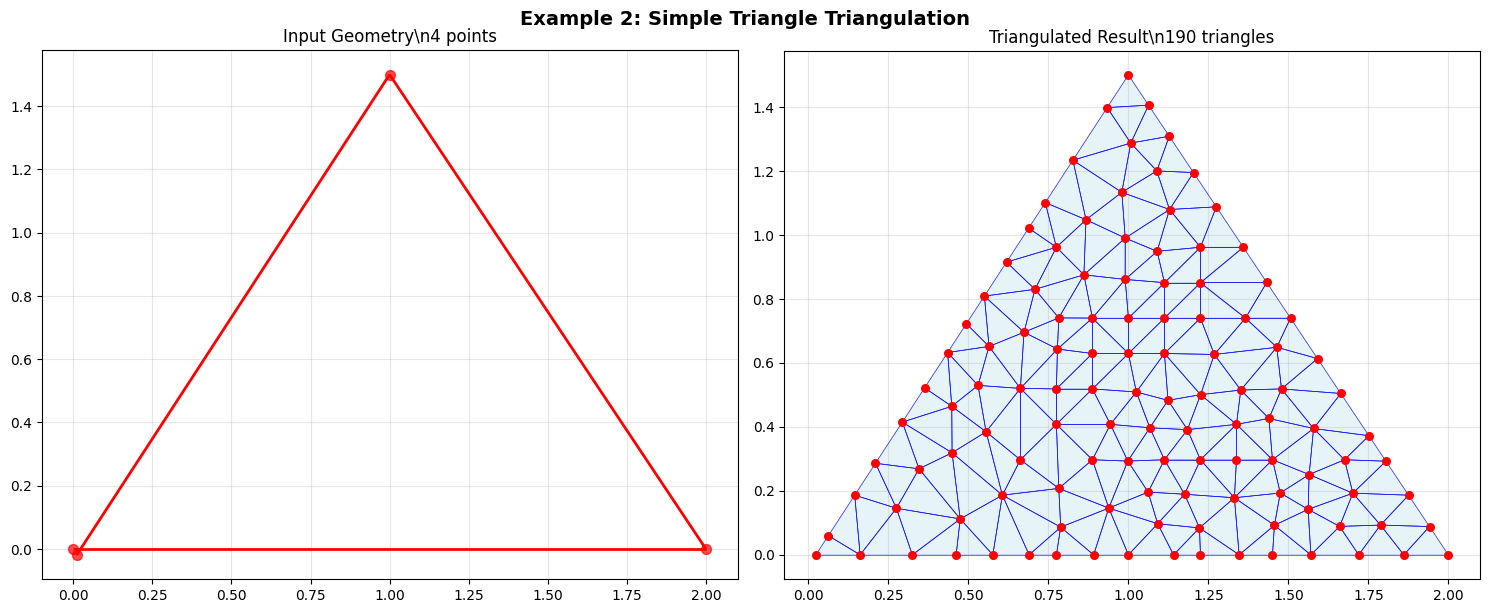

In [62]:
# Define a triangle
vertices_triangle = np.array([
    [0.0, 0.0],   # vertex 0
    [2.0, 0.0],   # vertex 1
    [1.0, 1.5],   # vertex 2
    [0.01, -0.02] # vertex 0'
])

edges_triangle = np.array([
    [0, 1],  # base
    [1, 2],  # right side
    [2, 3]   # left side
], dtype=np.int32)

# Low quality (faster, coarser mesh)
result = wm.triangulate_data(vertices_triangle, edges_triangle, flat_feature_angle=55, edge_length_r=0.05, cut_outside=True)
vertices, triangles, _, _ = result

print(f"{len(triangles)} triangles, {len(vertices)} vertices")

# Visualize
plot_triangulation(vertices, triangles, edges_triangle, 
                  title="Example 2: Simple Triangle Triangulation", 
                  input_vertices=vertices_triangle)

## Example 3: Complex Polygon with Hole

Let's create a more complex example with a polygon containing a hole.

Vertices: 12 (4 outer + 8 inner)
Edges: 12 (4 outer + 8 inner)
Hole points: 1
Loading and preprocessing ...

With hole: 129 triangles
Without hole: 139 triangles
remove duplicates:
#v 12->12
#e 12->12
simplify:
#v 12->12
#e 12->12
Loaded and preprocessed.
time = 0.000209s

BSP subdivision...
#v 112->192
#f 186->346
BSP subdivision done.
time = 0.000932s

Mesh optimization...
#v = 192(192)    unrounded = 0
#t = 346(346)
max_energy = 16.34692766628667
avg_energy = 3.133829452625638
min_angle = 8.543154758582519, max_angle = 157.5000026866604
< 5: 0, < 10: 0.0115606936416185, < 15: 0.02890173410404624
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 966
success 52
re-push 111
queue_s.size() = 90
success 10
re-push 24
queue_s.size() = 10
success 0
re-push 0
edge collapsing done!
time = 0.00153s
#v = 130(192)    unrounded = 0
#t = 222(346)
max_energy = 4.733139115142833
avg_energy = 2.427060654173697
min_angle = 22.50000038380

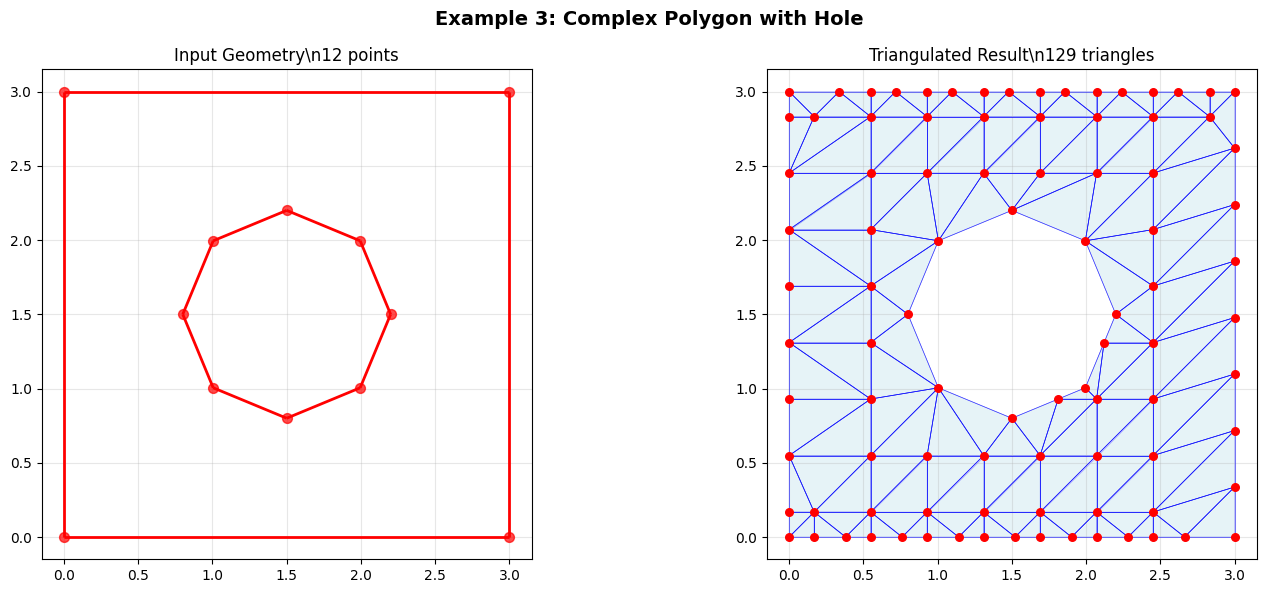

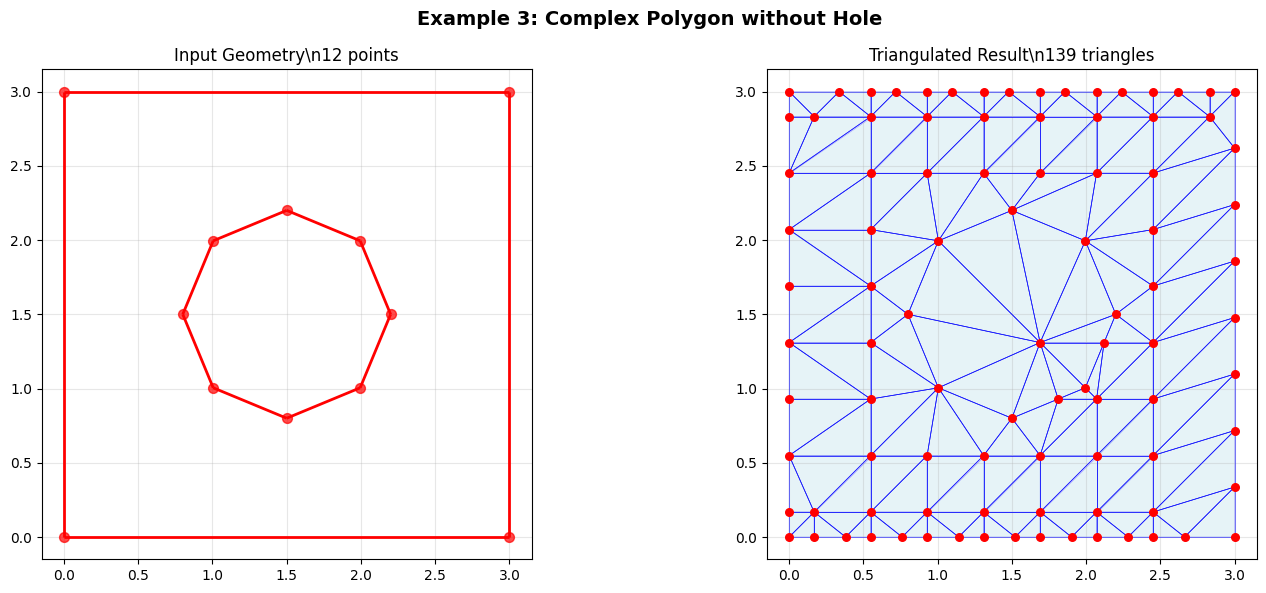

In [63]:
# Create a square with a circular hole approximation
from utils import create_circle_points

# Outer boundary (square)
outer_vertices = np.array([
    [0.0, 0.0], [3.0, 0.0], [3.0, 3.0], [0.0, 3.0]
])

# Inner boundary (octagon approximating a circle)
inner_vertices = create_circle_points([1.5, 1.5], 0.7, 8)

# Combine all vertices
all_vertices = np.vstack([outer_vertices, inner_vertices])

# Define edges
outer_edges = np.array([[0, 1], [1, 2], [2, 3], [3, 0]], dtype=np.int32)
inner_edges = np.array([
    [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 4]
], dtype=np.int32)

all_edges = np.vstack([outer_edges, inner_edges])

# Define hole point (inside the inner boundary)
hole_points = np.array([[1.5, 1.5]])

print(f"Vertices: {len(all_vertices)} ({len(outer_vertices)} outer + {len(inner_vertices)} inner)")
print(f"Edges: {len(all_edges)} ({len(outer_edges)} outer + {len(inner_edges)} inner)")
print(f"Hole points: {len(hole_points)}")

# Triangulate with hole
result_with_hole = wm.triangulate_data(all_vertices, all_edges, 
                                   hole_pts=hole_points, cut_outside=True)
vertices_hole, triangles_hole, _, _ = result_with_hole

# Triangulate without hole (for comparison)
result_no_hole = wm.triangulate_data(all_vertices, all_edges, cut_outside=True)
vertices_no_hole, triangles_no_hole, _, _ = result_no_hole

print(f"\nWith hole: {len(triangles_hole)} triangles")
print(f"Without hole: {len(triangles_no_hole)} triangles")

# Visualize
plot_triangulation(vertices_hole, triangles_hole, all_edges, 
                  title="Example 3: Complex Polygon with Hole", 
                  input_vertices=all_vertices)

plot_triangulation(vertices_no_hole, triangles_no_hole, all_edges, 
                  title="Example 3: Complex Polygon without Hole", 
                  input_vertices=all_vertices)

## Example 4: Advanced Parameters and Edge Length Control

Explore advanced parameters for controlling triangulation behavior.

Comparing different edge length controls...
Loading and preprocessing ...
remove duplicates:
#v 6->6
#e 6->6
simplify:
#v 6->6
#e 6->6
Loaded and preprocessed.
time = 0.000152s

BSP subdivision...
#v 106->164
#f 174->290
BSP subdivision done.
time = 0.0007559999999999999s

Mesh optimization...
#v = 164(164)    unrounded = 0
#t = 290(290)
max_energy = 4.981176342655092
avg_energy = 2.582011155565104
min_angle = 23.86713602338203, max_angle = 96.56551929006274
< 5: 0, < 10: 0, < 15: 0
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 806
success 32
re-push 60
queue_s.size() = 44
success 3
re-push 8
queue_s.size() = 7
success 0
re-push 0
edge collapsing done!
time = 0.000856s
#v = 129(164)    unrounded = 0
#t = 220(290)
max_energy = 3.120670898309812
avg_energy = 2.376654210101756
min_angle = 23.86713602338204, max_angle = 113.8671375586166
< 5: 0, < 10: 0, < 15: 0
> 175: 0, > 170: 0, > 165: 0

//////////////// postprocessing

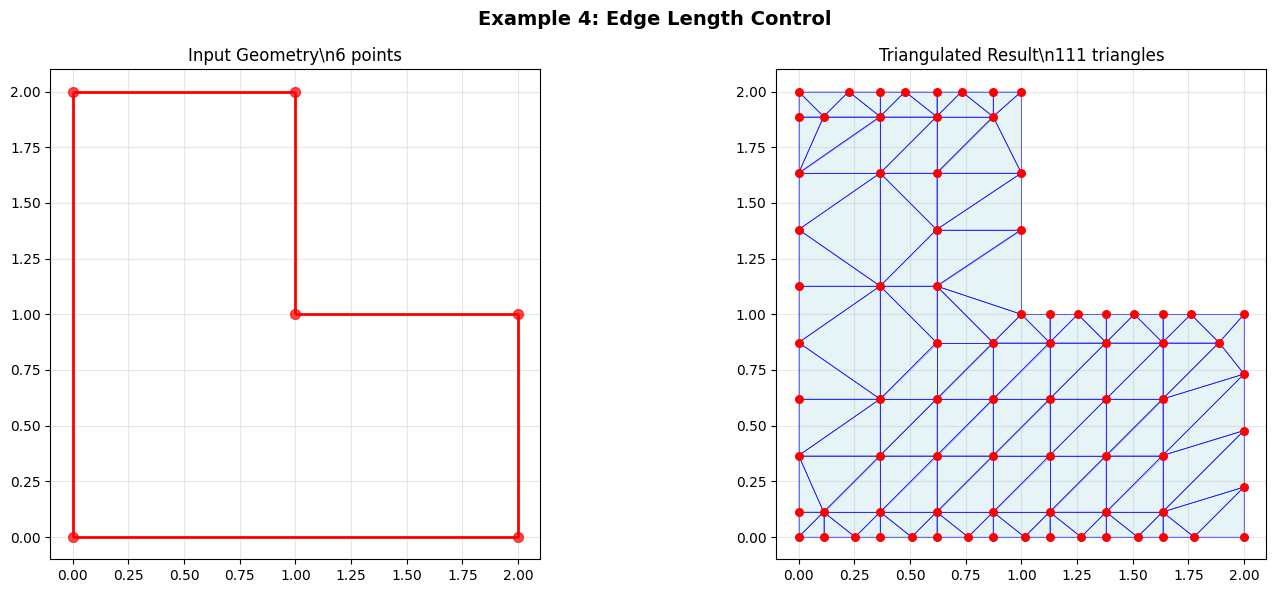

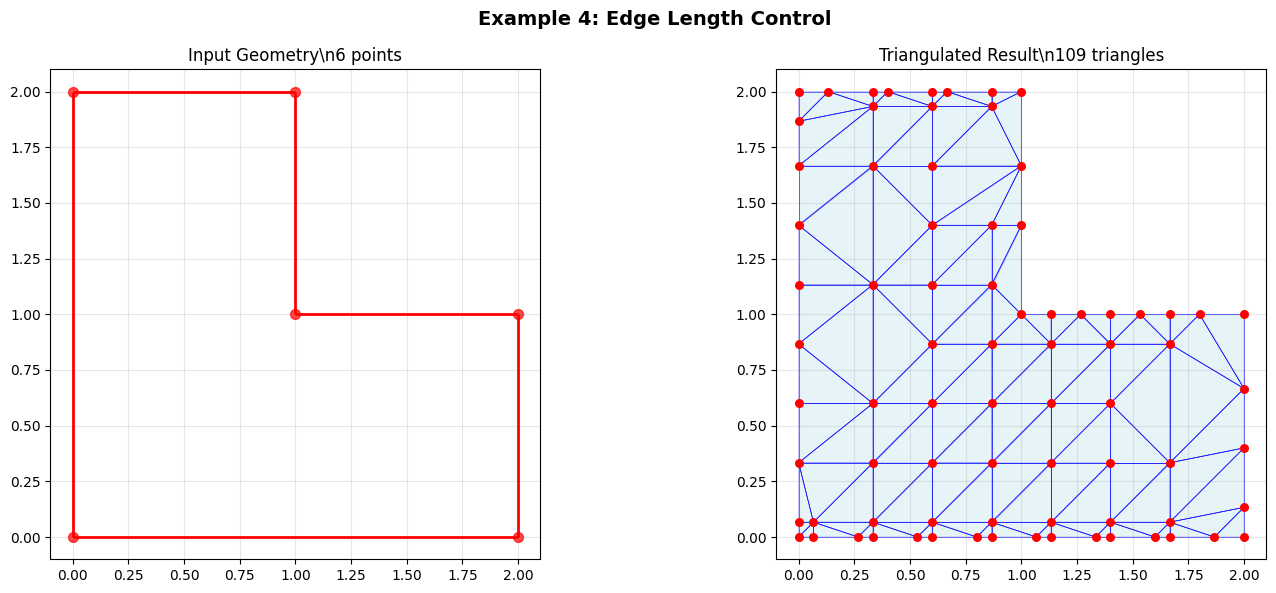

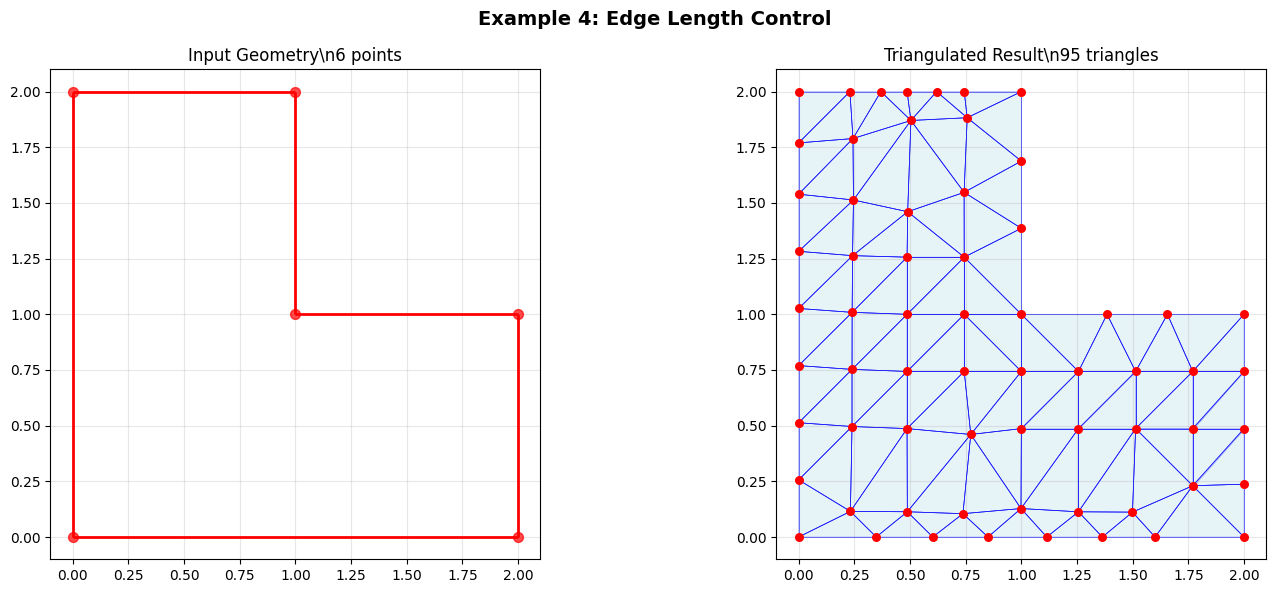

In [64]:
# Create an L-shaped polygon
vertices_L = np.array([
    [0.0, 0.0], [2.0, 0.0], [2.0, 1.0], [1.0, 1.0], 
    [1.0, 2.0], [0.0, 2.0]
])

edges_L = np.array([
    [0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0]
], dtype=np.int32)

print("Comparing different edge length controls...")

# Default settings
result_default = wm.triangulate_data(vertices_L, edges_L, cut_outside=True)
vertices_def, triangles_def, _, _ = result_default

# With target edge length
result_target = wm.triangulate_data(vertices_L, edges_L, 
                                target_edge_len=0.2, cut_outside=True)
vertices_target, triangles_target, _, _ = result_target

# With edge length ratio
result_ratio = wm.triangulate_data(vertices_L, edges_L, 
                               edge_length_r=0.1, cut_outside=True)
vertices_ratio, triangles_ratio, _, _ = result_ratio

print(f"Default: {len(triangles_def)} triangles")
print(f"Target edge length (0.2): {len(triangles_target)} triangles")
print(f"Edge length ratio (0.1): {len(triangles_ratio)} triangles")

plot_triangulation(vertices_def, triangles_def, edges_L, 
                  title="Example 4: Edge Length Control", 
                  input_vertices=vertices_L)

plot_triangulation(vertices_target, triangles_target, edges_L, 
                  title="Example 4: Edge Length Control", 
                  input_vertices=vertices_L)

plot_triangulation(vertices_ratio, triangles_ratio, edges_L, 
                  title="Example 4: Edge Length Control", 
                  input_vertices=vertices_L)

## Example 5: Star Shape and Feature Angles

Demonstrate triangulation of a star shape with sharp features.

Star shape: 10 vertices, 10 edges
Loading and preprocessing ...
Default feature angle: 46 triangles
Sharp feature angle (5°): 46 triangles
remove duplicates:
#v 10->10
#e 10->10
simplify:
#v 10->10
#e 10->10
Loaded and preprocessed.
time = 0.000101s

BSP subdivision...
#v 110->165
#f 182->292
BSP subdivision done.
time = 0.0008929999999999999s

Mesh optimization...
#v = 165(165)    unrounded = 0
#t = 292(292)
max_energy = 141.1194332129616
avg_energy = 6.511404696516142
min_angle = 0.5978205962988773, max_angle = 145.1674406000276
< 5: 0.03767123287671233, < 10: 0.05136986301369863, < 15: 0.07191780821917808
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 835
success 58
re-push 124
queue_s.size() = 112
success 8
re-push 15
queue_s.size() = 7
success 1
re-push 1
edge collapsing done!
time = 0.001193s
#v = 98(165)    unrounded = 0
#t = 163(292)
max_energy = 5.035957805032821
avg_energy = 2.527921482307327
min_angle = 19.74

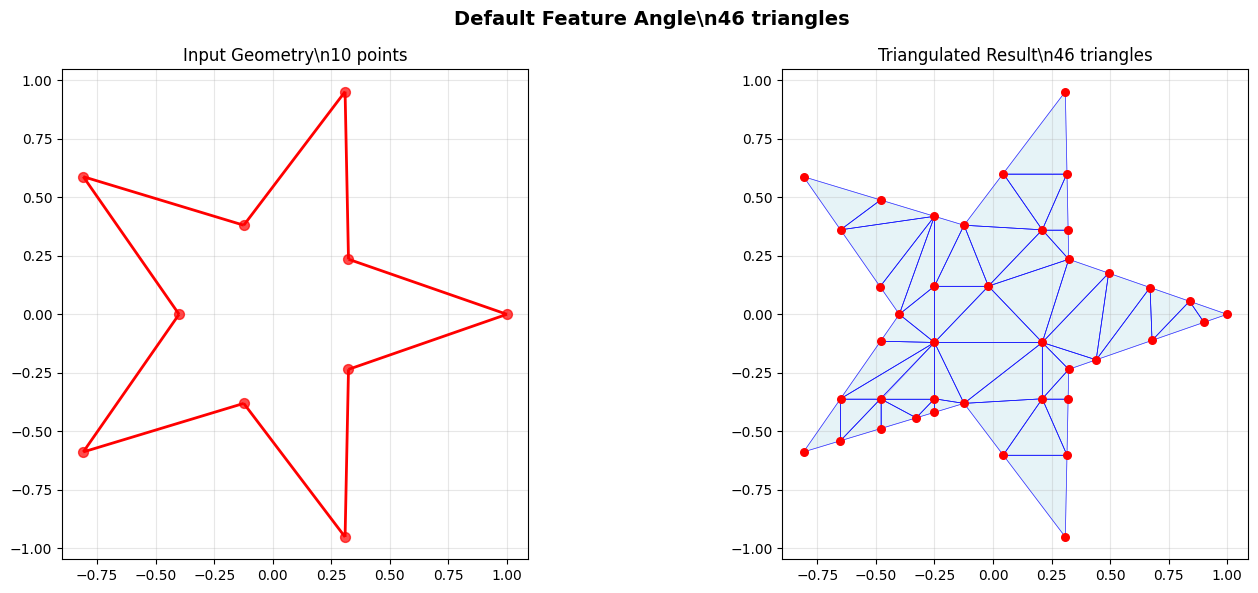

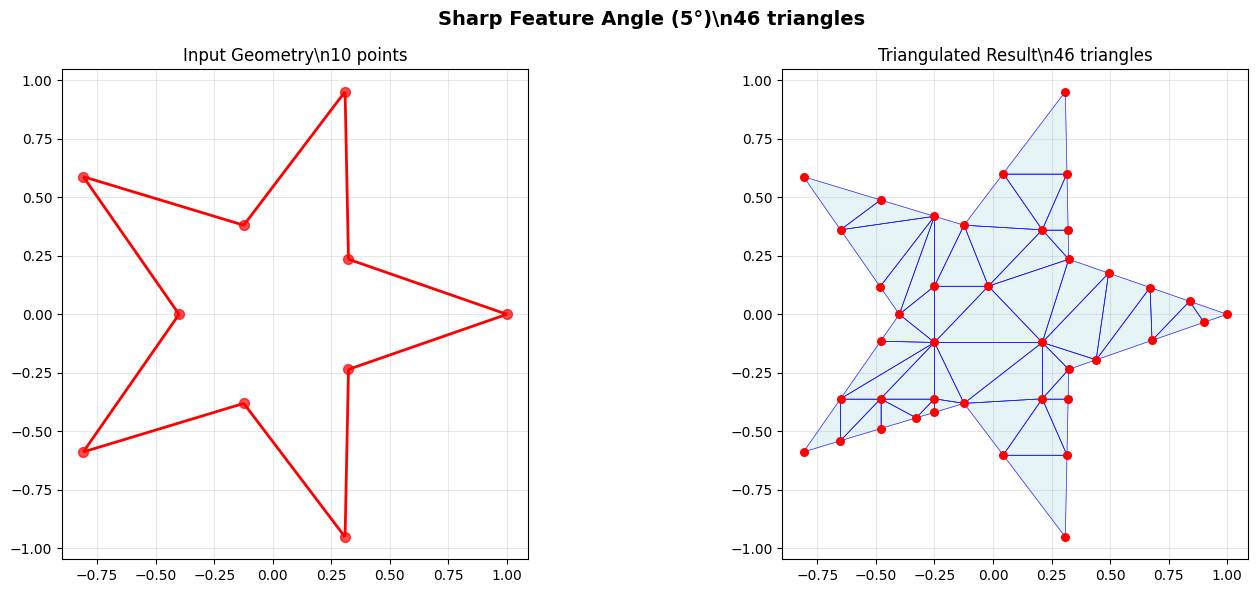

In [65]:
# Create a 5-pointed star
from utils import create_star

# Create star vertices
star_vertices = create_star([0, 0], 1.0, 0.4, 5)

# Create edges connecting consecutive vertices
n_star = len(star_vertices)
star_edges = np.array([[i, (i+1) % n_star] for i in range(n_star)], dtype=np.int32)

print(f"Star shape: {len(star_vertices)} vertices, {len(star_edges)} edges")

# Triangulate with different feature angle settings
result_default_angle = wm.triangulate_data(star_vertices, star_edges, cut_outside=True)
vertices_def_angle, triangles_def_angle, _, _ = result_default_angle

result_sharp_angle = wm.triangulate_data(star_vertices, star_edges, 
                                     flat_feature_angle=5.0, cut_outside=True)
vertices_sharp_angle, triangles_sharp_angle, _, _ = result_sharp_angle

print(f"Default feature angle: {len(triangles_def_angle)} triangles")
print(f"Sharp feature angle (5°): {len(triangles_sharp_angle)} triangles")

# Plot comparison
plot_triangulation(vertices_def_angle, triangles_def_angle, star_edges, 
                  title=f"Default Feature Angle\\n{len(triangles_def_angle)} triangles", input_vertices=star_vertices)

plot_triangulation(vertices_sharp_angle, triangles_sharp_angle, star_edges, 
                  title=f"Sharp Feature Angle (5°)\\n{len(triangles_sharp_angle)} triangles", input_vertices=star_vertices)

## Example 6: Point Cloud Triangulation

Demonstrate triangulation of scattered point clouds without predefined edges. This is useful for surface reconstruction from point data.

POINT CLOUD TRIANGULATION EXAMPLES

Random Point Cloud:
------------------
Input: 30 points + bounding box
Output: 89 vertices, 134 triangles
Loading and preprocessing ...
remove duplicates:
#v 34->34
#e 4->4
simplify:
#v 34->34
#e 4->4
Loaded and preprocessed.
time = 9.099999999999999e-05s

BSP subdivision...
#v 134->202
#f 230->366
BSP subdivision done.
time = 0.000594s

Mesh optimization...
#v = 202(202)    unrounded = 0
#t = 366(366)
max_energy = 17.63049110608308
avg_energy = 3.081261324097304
min_angle = 7.061002579534135, max_angle = 117.2497267954719
< 5: 0, < 10: 0.01092896174863388, < 15: 0.01366120218579235
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 1018
success 77
re-push 158
queue_s.size() = 111
success 2
re-push 6
edge collapsing done!
time = 0.00102s
#v = 123(202)    unrounded = 0
#t = 210(366)
max_energy = 4.054703142755959
avg_energy = 2.438407397681819
min_angle = 24.06281781025894, max_angle = 120

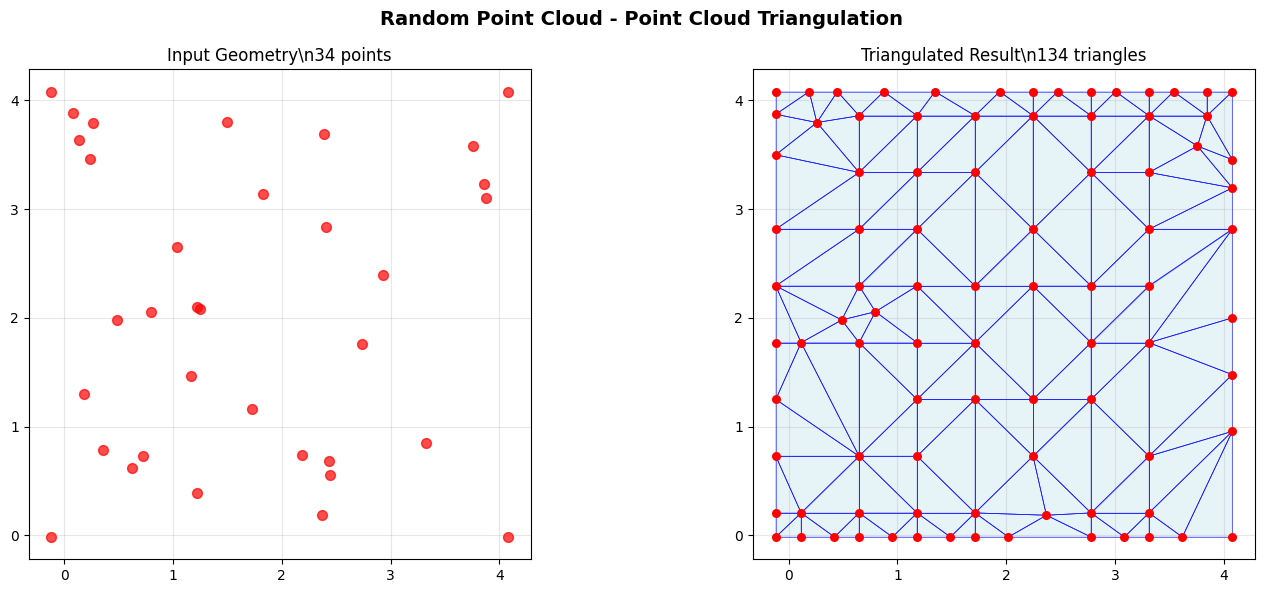


Circular Point Cloud:
--------------------
Input: 25 points + bounding box
Output: 91 vertices, 137 triangles
Loading and preprocessing ...
remove duplicates:
#v 29->29
#e 4->4
simplify:
#v 29->29
#e 4->4
Loaded and preprocessed.
time = 0.000159s

BSP subdivision...
#v 129->193
#f 220->348
BSP subdivision done.
time = 0.000771s

Mesh optimization...
#v = 193(193)    unrounded = 0
#t = 348(348)
max_energy = 12.68813267353383
avg_energy = 2.925510683899724
min_angle = 6.142241121889698, max_angle = 121.1193231919423
< 5: 0, < 10: 0.002873563218390805, < 15: 0.01436781609195402
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 968
success 60
re-push 114
queue_s.size() = 73
success 4
re-push 13
queue_s.size() = 1
success 1
re-push 2
edge collapsing done!
time = 0.000935s
#v = 128(193)    unrounded = 0
#t = 219(348)
max_energy = 3.951215871243347
avg_energy = 2.44866177505076
min_angle = 17.88308192651458, max_angle = 121.3732

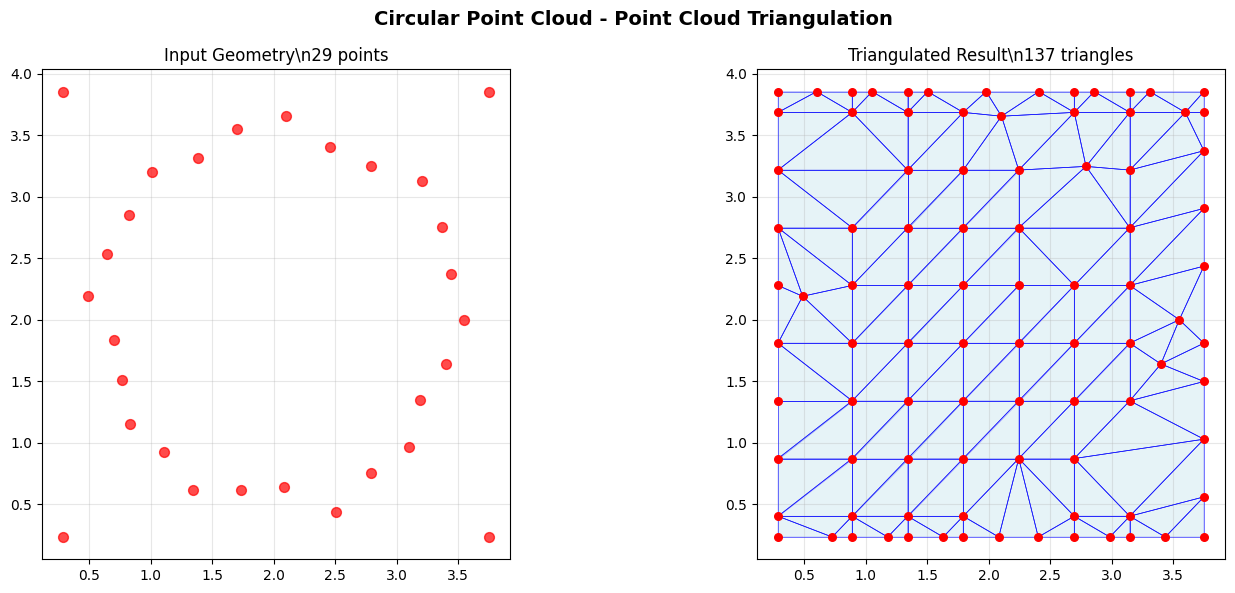


Grid-based Point Cloud:
----------------------
Input: 36 points + bounding box
Output: 76 vertices, 111 triangles
Loading and preprocessing ...
remove duplicates:
#v 40->40
#e 4->4
simplify:
#v 40->40
#e 4->4
Loaded and preprocessed.
time = 0.000214s

BSP subdivision...
#v 140->208
#f 242->378
BSP subdivision done.
time = 0.001236s

Mesh optimization...
#v = 208(208)    unrounded = 0
#t = 378(378)
max_energy = 18.06987324780246
avg_energy = 3.104630384521139
min_angle = 6.428930580759595, max_angle = 125.5096452184977
< 5: 0, < 10: 0.01058201058201058, < 15: 0.01587301587301587
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 1054
success 92
re-push 185
queue_s.size() = 105
success 6
re-push 14
queue_s.size() = 2
success 0
re-push 0
edge collapsing done!
time = 0.00123s
#v = 110(208)    unrounded = 0
#t = 184(378)
max_energy = 3.747695731023888
avg_energy = 2.442797647490552
min_angle = 22.1489258041277, max_angle = 120.

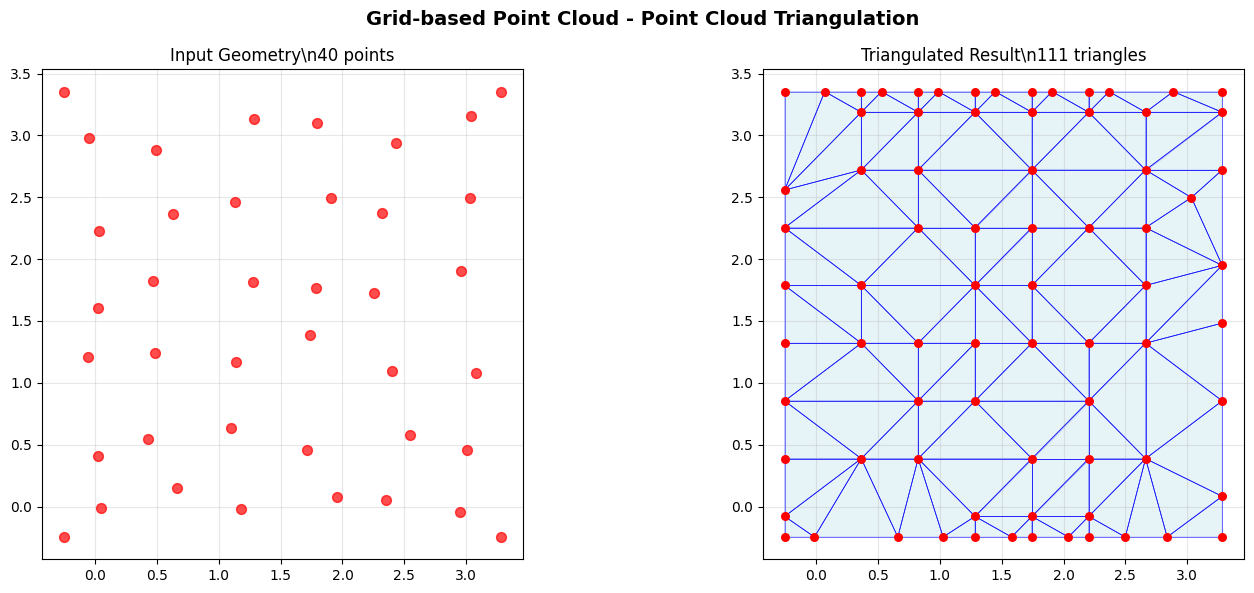


Spiral Point Cloud:
------------------
Input: 40 points + bounding box
Output: 85 vertices, 128 triangles
Loading and preprocessing ...
remove duplicates:
#v 44->44
#e 4->4
simplify:
#v 44->44
#e 4->4
Loaded and preprocessed.
time = 0.000155s

BSP subdivision...
#v 134->200
#f 232->364
BSP subdivision done.
time = 0.0008439999999999999s

Mesh optimization...
#v = 200(200)    unrounded = 0
#t = 364(364)
max_energy = 15.51996449744513
avg_energy = 3.309549983763111
min_angle = 4.280041032663823, max_angle = 121.3189429684521
< 5: 0.002747252747252747, < 10: 0.01373626373626374, < 15: 0.03296703296703297
> 175: 0, > 170: 0, > 165: 0

//////////////// preprocessing ////////////////
edge collapsing...
queue_s.size() = 1014
success 81
re-push 163
queue_s.size() = 71
success 1
re-push 2
edge collapsing done!
time = 0.0009549999999999999s
#v = 118(200)    unrounded = 0
#t = 201(364)
max_energy = 5.62289642684168
avg_energy = 2.659048947525103
min_angle = 13.05440035677216, max_angle = 133.157

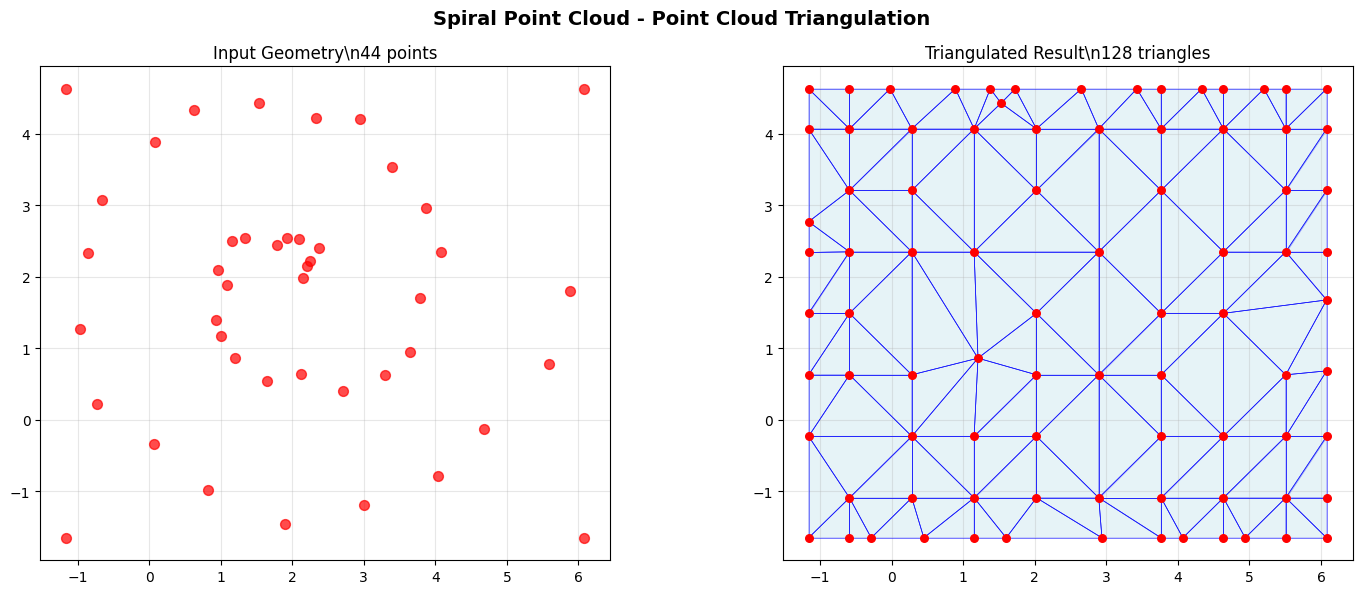

In [66]:
from utils import generate_point_cloud

# Generate different types of point clouds and triangulate them
point_cloud_types = [
    ('random', 30, 'Random Point Cloud'),
    ('circle', 25, 'Circular Point Cloud'),
    ('grid', 36, 'Grid-based Point Cloud'),
    ('spiral', 40, 'Spiral Point Cloud')
]

print('=' * 60)
print('POINT CLOUD TRIANGULATION EXAMPLES')
print('=' * 60)

for shape, n_points, description in point_cloud_types:
    print(f'\n{description}:')
    print('-' * len(description))
    
    # Generate point cloud
    points = generate_point_cloud(n_points, shape=shape)
    
    # For point cloud triangulation, we create a bounding box constraint
    # This prevents the convex hull from creating overly large triangles
    min_x, min_y = points.min(axis=0) - 0.2
    max_x, max_y = points.max(axis=0) + 0.2
    
    # Add bounding box vertices
    bbox_vertices = np.array([
        [min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]
    ])
    
    # Combine with original points
    all_vertices = np.vstack([points, bbox_vertices])
    
    # Create bounding box edges
    n_orig = len(points)
    bbox_edges = np.array([
        [n_orig, n_orig+1], [n_orig+1, n_orig+2], 
        [n_orig+2, n_orig+3], [n_orig+3, n_orig]
    ], dtype=np.int32)
    
    try:
        # Triangulate with bounding box constraint
        result = wm.triangulate_data(all_vertices, bbox_edges, 
                                 target_edge_len=0.3, cut_outside=True)
        vertices_out, triangles_out, _, _ = result
        
        print(f'Input: {len(points)} points + bounding box')
        print(f'Output: {len(vertices_out)} vertices, {len(triangles_out)} triangles')
        
        plot_triangulation(vertices_out, triangles_out, 
                           title=f'{description} - Point Cloud Triangulation',
                           input_vertices=all_vertices)
        
    except Exception as e:
        print(f'Error during triangulation: {e}')

## Example 7: Curved Constraints with Bézier Features

Demonstrate triangulation using PyTriWild's native Bézier curve feature support.

NATIVE BÉZIER CURVE FEATURES EXAMPLE
Vertices: 6
Edges: 6
Curved features: 1
Triangulating...
Loading and preprocessing ...
Result: 116 vertices, 196 triangles
remove duplicates:
#v 6->6
#e 6->6
simplify
0/1 features are simplified
#features = 1

get_inflections & cut_reflex
#features = 1

sample_features

remove_high_curvature
0 segments are removed
#features = 1

remove_short_features
0 short edges are removed
#features = 1

mu_separation
#pairs = 0
#check_feature = 0(1)
4.9e-05s
#features = 1

cut_inflections
#features = 1

remove_short_features again
0 short edges are removed
#features = 1

gen_segments
#v = 129
#e = 128

refine:
#v 6->129
#e 6->128
simplify:
#v 129->129
#e 128->128
#secondary_features = 0
Loaded and preprocessed.
time = 0.009557s

BSP subdivision...
#v 207->207
#f 378->378
BSP subdivision done.
time = 0.000392s

Mesh optimization...
#v = 207(207)    unrounded = 0
#t = 378(378)
max_energy = 15.283814396564
avg_energy = 6.998918579315366
min_angle = 4.35250720636912

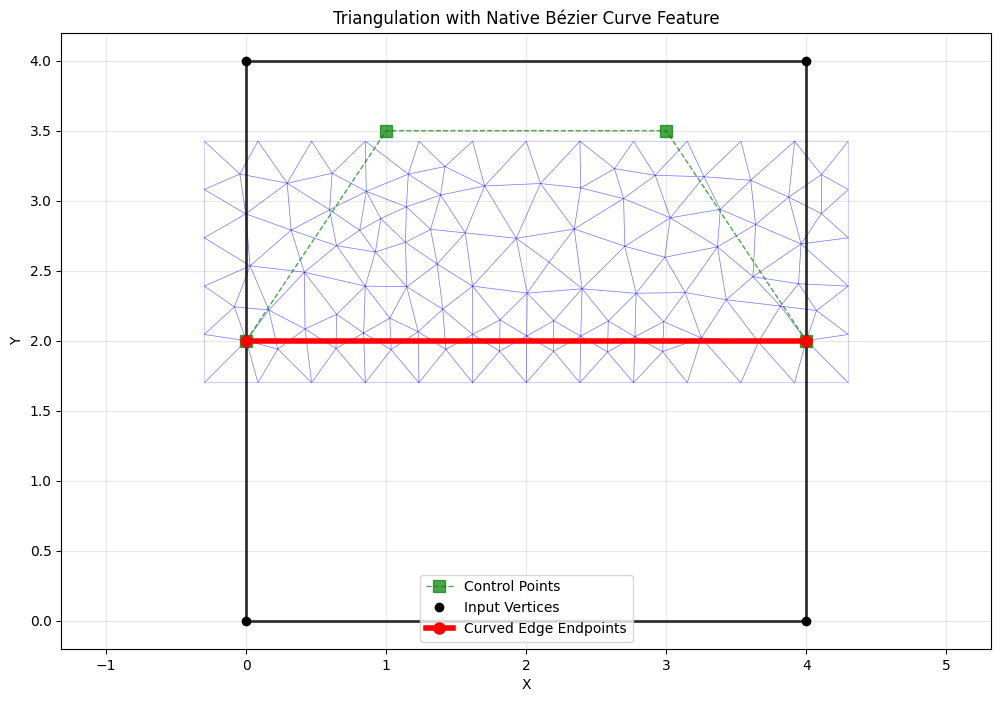


Feature Info Details:
Curve type: BezierCurve
Degree: 3
Control points: [[0, 2], [1, 3.5], [3, 3.5], [4, 2]]
Connected vertices: [4, 5]


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import json
import json

print('NATIVE BÉZIER CURVE FEATURES EXAMPLE')
print('=' * 45)

# Create a simple domain with curved boundary
# We'll create a square with one curved edge
vertices = np.array([
    [0, 0],  # 0: bottom-left
    [4, 0],  # 1: bottom-right  
    [4, 4],  # 2: top-right
    [0, 4],  # 3: top-left
    [0, 2],  # 4: left-middle (start of curve)
    [4, 2]   # 5: right-middle (end of curve)
])

# Define edges - most are straight, one will be curved
edges = np.array([
    [0, 1],  # bottom edge
    [1, 5],  # right bottom to curve end
    [5, 2],  # right curve end to top-right
    [2, 3],  # top edge
    [3, 4],  # left top to curve start
    [4, 0]   # left curve start to bottom-left
    # Note: edge [4,5] will be the curved edge defined in feature_info
])

# Define the Bézier curve feature using feature_info
# Try dictionary format with string keys (matching type hint)
feature_dicts = [{
    "type": "BezierCurve",
    "curve_id": 0,
    "v_ids": [4, 5],  # vertex indices for curve endpoints
    "paras": [0.0, 1.0],  # parameter range (start, end)
    "degree": 3,  # cubic Bézier
    "poles": [  # control points
        [0, 2],    # start point (matches vertex 4)
        [1, 3.5],  # first control point
        [3, 3.5],  # second control point  
        [4, 2]     # end point (matches vertex 5)
    ]
}]

# Convert to JSON string
import json
feature_json = json.dumps(feature_dicts, indent=2)

print(f'Vertices: {len(vertices)}')
print(f'Edges: {len(edges)}')
print(f'Curved features: 1')
# print(f'Bézier degree: {feature_dict["degree"]}')
# print(f'Control points: {len(feature_dict["poles"])}')

# Triangulate with native Bézier curve features
# Try dictionary format first (matches type hint)
print('Triangulating...')
# vertices_out, triangles_out, boundary_edges, info = wm.triangulate_data(
vertices_out, triangles_out, boundary_edges, info = triwild.triangulate(
    vertices, edges, 
    stop_quality=15.0,  # Higher quality for curved features
    target_edge_length=0.3,
    feature_info=feature_json,
)

print(f'Result: {len(vertices_out)} vertices, {len(triangles_out)} triangles')

# Plot the result
plt.figure(figsize=(12, 8))

# Plot triangulation
for tri in triangles_out:
    triangle = vertices_out[tri]
    plt.plot(np.append(triangle[:, 0], triangle[0, 0]), 
            np.append(triangle[:, 1], triangle[0, 1]), 'b-', alpha=0.3, linewidth=0.5)

# Plot control points and control polygon
control_pts = np.array(feature_dicts[0]['poles'])
plt.plot(control_pts[:, 0], control_pts[:, 1], 'gs--', linewidth=1, markersize=8, alpha=0.7, label='Control Points')

# Plot input vertices
plt.plot(vertices[:, 0], vertices[:, 1], 'ko', markersize=6, label='Input Vertices')

# Plot edges
for edge in edges:
    v1, v2 = vertices[edge]
    plt.plot([v1[0], v2[0]], [v1[1], v2[1]], 'k-', linewidth=2, alpha=0.8)

# Highlight the curved edge
curved_edge_vertices = vertices[[4, 5]]  # vertices connected by curve
plt.plot(curved_edge_vertices[:, 0], curved_edge_vertices[:, 1], 'ro-', 
            linewidth=4, markersize=8, label='Curved Edge Endpoints')

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Triangulation with Native Bézier Curve Feature')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print('\nFeature Info Details:')
print(f'Curve type: {feature_dicts[0]["type"]}')
print(f'Degree: {feature_dicts[0]["degree"]}')
print(f'Control points: {feature_dicts[0]["poles"]}')
print(f'Connected vertices: {feature_dicts[0]["v_ids"]}')